In [3]:
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_orig = x_test
from keras import backend as k

In [6]:
img_rows, img_cols = x_train.shape[1:]
if k.image_data_format == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:
    shape_ord = (img_rows, img_cols, 1)

In [7]:
x_train = x_train.reshape((x_train.shape[0],) + shape_ord)
x_test = x_test.reshape((x_test.shape[0],) + shape_ord)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0


In [8]:
y_train =np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)


Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 144s 3ms/step - loss: 0.3522 - acc: 0.8905 - val_loss: 0.1085 - val_acc: 0.9693
Epoch 2/10
45000/45000 [==============================] - 139s 3ms/step - loss: 0.2052 - acc: 0.9408 - val_loss: 0.0902 - val_acc: 0.9737
Epoch 3/10
45000/45000 [==============================] - 133s 3ms/step - loss: 0.1824 - acc: 0.9473 - val_loss: 0.0869 - val_acc: 0.9772
Epoch 4/10
45000/45000 [==============================] - 140s 3ms/step - loss: 0.1867 - acc: 0.9482 - val_loss: 0.0827 - val_acc: 0.9767
Epoch 5/10
45000/45000 [==============================] - 141s 3ms/step - loss: 0.1774 - acc: 0.9506 - val_loss: 0.0853 - val_acc: 0.9777
Epoch 6/10
45000/45000 [==============================] - 140s 3ms/step - loss: 0.1740 - acc: 0.9533 - val_loss: 0.0857 - val_acc: 0.9761 0. - ETA: 3s - loss
Epoch 7/10
45000/45000 [==============================] - 153s 3ms/step - loss: 0.1848 - acc: 0.9516 -

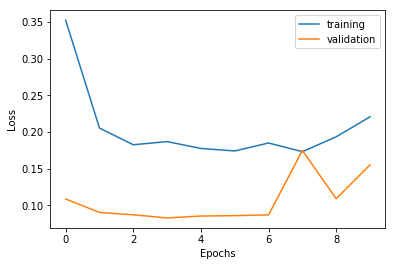

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = 10
batch_size = 64
filter_size = 3
pool_size = 2
num_filters = 32

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)


model = Sequential()
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("accuracy")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'])
    plt.show()
    
plot_history(history)
    


In [42]:
loss, accuracy =model.evaluate(x_test, y_test, verbose=0)
print(loss)
print(accuracy)


0.08273042369774193
0.9754


In [44]:
slice = 15

predicted = model.predict(x_test[:slice]).argmax(-1)

print(predicted)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


In [45]:
def build_model():
    model = Sequential()
    model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

    def plot_history(value):
        plt.figure()
        plt.xlabel('Epochs')
        plt.ylabel("Loss")
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.legend(['training', 'validation'])
    
        plt.figure()
        plt.xlabel('Epochs')
        plt.ylabel("accuracy")
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.legend(['training', 'validation'])
        plt.show()
    
    plot_history(history)
    
    loss, accuracy =model.evaluate(x_test, y_test, verbose=0)
    print(loss)
    print(accuracy)
    

Train on 33750 samples, validate on 11250 samples
Epoch 1/2
33750/33750 [==============================] - 107s 3ms/step - loss: 0.3528 - acc: 0.8903 - val_loss: 0.1635 - val_acc: 0.9516
Epoch 2/2
33750/33750 [==============================] - 106s 3ms/step - loss: 0.2023 - acc: 0.9407 - val_loss: 0.0943 - val_acc: 0.9732


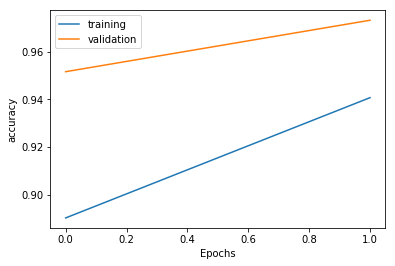

0.08182726142096654
0.9757
3min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [47]:
%timeit -n1 -r1 build_model()